# Analyzing Ford GoBike System Data
#### by: Raffael Schlender

## Introduction
In this project, I will investigate trip data of users in San Francisco Bay Area. The main focus is to wrangle and explore a `201902-fordgobike-tripdata` datafile by using Python visualization libraries, starting from plots of single variables and building up to plots of multiple variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read the csv file, and check its top 10 rows
df = pd.read_csv(r"C:\Users\D441118\Desktop\Udacity\Project7_Visualization\201902-fordgobike-tripdata.csv")
print(df.shape)
df.head(10)

(183412, 16)


duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   
6             300.0                              Palm St at Willow St   
7              10.0                        Washington St at Kearny St   
8              10.0                        Washington St at Kearny St   
9              19.0                              Post St at Kearny St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   
6               37.317298              -121.884995           312.0   
7               37.795393              -122.404770           127.0   
8               37.795393              -122.404770           127.0   
9               37.788975              -122.403452           121.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   
6                      San Jose Diridon Station             37.329732   
7                        Valencia St at 21st St             37.756708   
8                        Valencia St at 21st St             37.756708   
9                            Mission Playground             37.759210   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   
6            -121.901782     3803  Subscriber             1983.0   
7            -122.421025     6329  Subscriber             1989.0   
8            -122.421025     6548  Subscriber             1988.0   
9            -122.421339     6488  Subscriber             1992.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1        

In [3]:
# check info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# check descriptive statistics of df
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [5]:
# check null values of df
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Structure of Dataset

The Dataset consists of information regarding 183.412 bike trips, including its timing and geolocation of the start and end of each trip.
Each trip is anonymized and includes:

- Trip
- Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### Features of interest?

- When are most trips taken, in term of hour of the day or day of the week? And how does this differ between Customers and Subscribers? Is there a difference in term of gender? 

- Does the average duration of bike trip depend on whether a user is a Subscriber or Customer and of Gender?


### Features of investigation?

1. Trip Duration
2. User Type
3. Member Gender
4. Start Date (Weekday and Hour of Day)

## Data Wrangling

Before I start with the data exploration i will do some data wrangling. The following points will be processed in the next steps:
1. Convert *duration_sec* to minutes
2. Delete values where *start_station_id* is null
3. Delete *bike_share_for_all_trip* column 
4. Convert *start_time* & *end_time* to datetime
5. Extract weekday and hour of day information from *start_time*
6. Drop all rows where *member_birth_year* is null
7. Calculate age of the members from *member_birth_year*
8. Convert *user_type* & *member_gender* to category

First I will make a copie of the dataframe before cleaning:

In [6]:
# make copy of df before cleaning
df_clean = df.copy()

#### 1. Convert *duration_sec* to minutes

In [7]:
# convert duration_sec to minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

# convert duration_min to float
df_clean['duration_min'] = df_clean['duration_min'].astype(float)

# show head of df
df_clean.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  duration_min  
0          Male                      No    869.750000  
1           NaN                      No    708.683333  
2          Male                      No   1030.900000  
3         Other                      No    608.166667  
4          Male                     Yes     26.416667

#### 2. Delete values where *start_station_id* is null

In [8]:
# delete values where start_station_id is null
df_clean[df_clean['start_station_id'].isna()]
df_clean.dropna(subset=['start_station_id'], inplace=True)

# check for null values
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
duration_min                  0
dtype: int64

#### 3. Delete *bike_share_for_all_trip* column 

In [9]:
# delete bike_share_for_all_trip column
df_clean.drop(columns='bike_share_for_all_trip', inplace=True, axis=1)

# show head of df
df_clean.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender  duration_min  
0          Male    869.750000  
1           NaN    708.683333  
2          Male   1030.900000  
3         Other    608.166667  
4          Male     26.416667

#### 4. Convert *start_time* & *end_time* to datetime

In [12]:
# convert start_time & end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# check info of df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 183411 to 122186
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type  

#### 5. Extract weekday & hour of day information from *start_time*

In [13]:
# extract dayofweek & hours information from start_time
df_clean['start_time_dayofweek'] = df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hourofday'] = df_clean.start_time.dt.strftime('%H')

# sort start_time_hourofday ascending
df_clean = df_clean.sort_values(by='start_time_hourofday',ascending=True)

# show head of df
df_clean.head()

duration_sec              start_time                end_time  \
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   
58622            604 2019-02-21 00:45:41.498 2019-02-21 00:55:46.331   
58620             80 2019-02-21 00:55:29.356 2019-02-21 00:56:49.877   
58619            339 2019-02-21 00:51:17.397 2019-02-21 00:56:57.130   
58618            858 2019-02-21 00:45:19.296 2019-02-21 00:59:38.223   

        start_station_id           start_station_name  start_station_latitude  \
183411              24.0        Spear St at Folsom St               37.789677   
58622              245.0       Downtown Berkeley BART               37.870139   
58620              243.0  Bancroft Way at College Ave               37.869360   
58619              114.0   Rhode Island St at 17th St               37.764478   
58618               10.0   Washington St at Kearny St               37.795393   

        start_station_longitude  end_station_id  \
183411              -122.390428            37.0   
58622               -122.268422           241.0   
58620               -122.254337           239.0   
58619               -122.402570            92.0   
58618               -122.404770            76.0   

                     end_station_name  end_station_latitude  \
183411            2nd St at Folsom St             37.785000   
58622              Ashby BART Station             37.852477   
58620   Bancroft Way at Telegraph Ave             37.868813   
58619           Mission Bay Kids Park             37.772301   
58618      McCoppin St at Valencia St             37.771662   

        end_station_longitude  bike_id   user_type  member_birth_year  \
183411            -122.395936     1057  Subscriber             1989.0   
58622             -122.270213     1236  Subscriber             1997.0   
58620             -122.258764      551  Subscriber             1992.0   
58619             -122.393028     3247    Customer             1981.0   
58618             -122.422423     6264  Subscriber             1979.0   

       member_gender  duration_min start_time_dayofweek start_time_hourofday  
183411          Male      4.516667                  Fri                   00  
58622           Male     10.066667                  Thu                   00  
58620           Male      1.333333                  Thu                   00  
58619         Female      5.650000                  Thu                   00  
58618         Female     14.300000                  Thu                   00

In [14]:
# check for value_counts
df_clean['start_time_dayofweek'].value_counts()

Thu    35176
Tue    31781
Wed    29609
Fri    28962
Mon    26807
Sun    15503
Sat    15377
Name: start_time_dayofweek, dtype: int64

In [15]:
# convert start_time_dayofweek to ordinal variables
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

# check info of df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 183411 to 122186
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type  

#### 6. Drop all rows where *member_birth_year* is null

In [16]:
# drop all rows where member_birth_year is null
df_clean[df_clean['member_birth_year'].isna()]
df_clean.dropna(subset=['member_birth_year'], inplace=True)

# check for null values
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
duration_min               0
start_time_dayofweek       0
start_time_hourofday       0
dtype: int64

#### 7. Calculate age of the members from *member_birth_year*

In [17]:
# calculate age of the members from member_birth_year
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

# check head of df
df_clean.head()

duration_sec              start_time                end_time  \
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   
58622            604 2019-02-21 00:45:41.498 2019-02-21 00:55:46.331   
58620             80 2019-02-21 00:55:29.356 2019-02-21 00:56:49.877   
58619            339 2019-02-21 00:51:17.397 2019-02-21 00:56:57.130   
58618            858 2019-02-21 00:45:19.296 2019-02-21 00:59:38.223   

        start_station_id           start_station_name  start_station_latitude  \
183411              24.0        Spear St at Folsom St               37.789677   
58622              245.0       Downtown Berkeley BART               37.870139   
58620              243.0  Bancroft Way at College Ave               37.869360   
58619              114.0   Rhode Island St at 17th St               37.764478   
58618               10.0   Washington St at Kearny St               37.795393   

        start_station_longitude  end_station_id  \
183411              -122.390428            37.0   
58622               -122.268422           241.0   
58620               -122.254337           239.0   
58619               -122.402570            92.0   
58618               -122.404770            76.0   

                     end_station_name  end_station_latitude  \
183411            2nd St at Folsom St             37.785000   
58622              Ashby BART Station             37.852477   
58620   Bancroft Way at Telegraph Ave             37.868813   
58619           Mission Bay Kids Park             37.772301   
58618      McCoppin St at Valencia St             37.771662   

        end_station_longitude  bike_id   user_type  member_birth_year  \
183411            -122.395936     1057  Subscriber             1989.0   
58622             -122.270213     1236  Subscriber             1997.0   
58620             -122.258764      551  Subscriber             1992.0   
58619             -122.393028     3247    Customer             1981.0   
58618             -122.422423     6264  Subscriber             1979.0   

       member_gender  duration_min start_time_dayofweek start_time_hourofday  \
183411          Male      4.516667                  Fri                   00   
58622           Male     10.066667                  Thu                   00   
58620           Male      1.333333                  Thu                   00   
58619         Female      5.650000                  Thu                   00   
58618         Female     14.300000                  Thu                   00   

        member_age  
183411        30.0  
58622         22.0  
58620         27.0  
58619         38.0  
58618         40.0

In [18]:
# convert member_age & member_birth_year to int
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

# check info of df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 183411 to 122186
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type  

#### 8. Convert *user_type* & *member_gender* to category

In [19]:
# convert user_type & member_gender to category
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

# check info of df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 183411 to 122186
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type  

## Univariate Exploration

In this section, I will investigate distribution of individuals variables and I will have a deeper look into abnormalities and outliers.

### Explore Time spent on the Bike in Minutes

In [20]:
# check descriptive statistics for duration_min
df_clean.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [21]:
# plot time duration in minutes
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'duration_min', bins=bins);
plt.xlabel('Time Duration (min)')

Text(0.5, 0, 'Time Duration (min)')

#### Observations

> -  The hist plot indicates, that there are some outliers (>200min). 
#### This will be checked in the following step.

In [22]:
# check for values >200min
outliers = (df_clean['duration_min'] > 200)
df_clean.loc[outliers]

duration_sec              start_time                end_time  \
129786         14962 2019-02-10 00:21:45.154 2019-02-10 04:31:07.158   
113339         45019 2019-02-12 00:07:21.561 2019-02-12 12:37:41.106   
3401           62452 2019-02-28 00:04:01.344 2019-02-28 17:24:54.137   
74162          38991 2019-02-19 00:39:02.948 2019-02-19 11:28:54.781   
83365          12001 2019-02-18 01:24:38.932 2019-02-18 04:44:40.272   
...              ...                     ...                     ...   
86063          52869 2019-02-16 23:10:37.649 2019-02-17 13:51:47.047   
91177          38026 2019-02-15 23:35:36.678 2019-02-16 10:09:23.627   
137646         34477 2019-02-07 23:02:24.814 2019-02-08 08:37:02.244   
174403         67512 2019-02-01 23:54:03.833 2019-02-02 18:39:16.575   
122186         47895 2019-02-10 23:30:40.092 2019-02-11 12:48:55.302   

        start_station_id                            start_station_name  \
129786             294.0                       Pierce Ave at Market St   
113339             247.0                     Fulton St at Bancroft Way   
3401               154.0                           Doyle St at 59th St   
74162               29.0                 O'Farrell St at Divisadero St   
83365                5.0  Powell St BART Station (Market St at 5th St)   
...                  ...                                           ...   
86063               96.0                         Dolores St at 15th St   
91177               29.0                 O'Farrell St at Divisadero St   
137646              73.0                        Pierce St at Haight St   
174403              19.0                          Post St at Kearny St   
122186              50.0                         2nd St at Townsend St   

        start_station_latitude  start_station_longitude  end_station_id  \
129786               37.327581              -121.884559           301.0   
113339               37.867789              -122.265896           242.0   
3401                 37.841924              -122.288045           213.0   
74162                37.782405              -122.439446            84.0   
83365                37.783899              -122.408445             5.0   
...                        ...                      ...             ...   
86063                37.766210              -122.426614            73.0   
91177                37.782405              -122.439446            29.0   
137646               37.771793              -122.433708            67.0   
174403               37.788975              -122.403452             6.0   
122186               37.780526              -122.390288            50.0   

                                         end_station_name  \
129786                               Willow St at Vine St   
113339                              Milvia St at Derby St   
3401                                32nd St at Adeline St   
74162                                         Duboce Park   
83365        Powell St BART Station (Market St at 5th St)   
...                                                   ...   
86063                              Pierce St at Haight St   
91177                       O'Farrell St at Divisadero St   
137646  San Francisco Caltrain Station 2  (Townsend St...   
174403                      The Embarcadero at Sansome St   
122186                              2nd St at Townsend St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
129786             37.318450            -121.883172     2006    Customer   
113339             37.860125            -122.269384      364  Subscriber   
3401               37.823847            -122.281193     4683  Subscriber   
74162              37.769201            -122.433812     5130  Subscriber   
83365              37.783899            -122.408445     6578  Subscriber   
...                      ...                    ...      ...         ...   
86063              37.771793            -122.433708     4971    Customer   
91177       

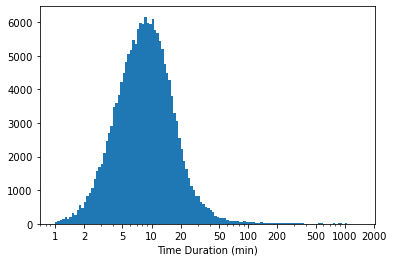

In [23]:
# plot time duration again with a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Time Duration (min)');

#### Observations

> - The plot indicates, that most of the bike rides are between 1 and 60 minutes. 
#### I will exclude all data where duration_min > 60.

In [24]:
# include only data where duration_min <= 60min
df_clean = df_clean[df_clean['duration_min'] <= 60]

### Customer vs. Subscriber

<AxesSubplot:xlabel='user_type', ylabel='count'>

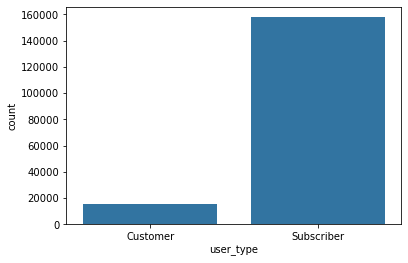

In [25]:
# countplot user_type
sb.countplot(data = df_clean ,x='user_type', color=sb.color_palette()[0])

#### Observations

> - There are more Subscriber than Customer user.

### Explore Weekday and Hour of Day

In [26]:
# countplot start_time_dayofweek
sb.countplot(data = df_clean, x='start_time_dayofweek', color=sb.color_palette()[0])

<AxesSubplot:xlabel='start_time_dayofweek', ylabel='count'>

#### Observations

> - Most bike rides start on Thursday. 
> - Low frequency on the weekend.

In [27]:
# countplot start_time_hourofday
sb.countplot(data = df_clean, x='start_time_hourofday', color=sb.color_palette()[0])

<AxesSubplot:xlabel='start_time_hourofday', ylabel='count'>

#### Observations

> - Most bike rides start on 8:00 AM and 5:00 PM.

### Distribution of Member Age 

In [28]:
# check descriptive statistics for member_age
df_clean['member_age'].describe()

count    173566.000000
mean         34.191610
std          10.116912
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

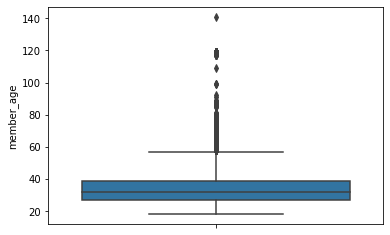

In [29]:
# boxplot member_age
sb.boxplot(data = df_clean, y = 'member_age');

#### Observations

> - It seems that there are some unlogical outliers. 
#### I will exclude all data where member_age > 60.

In [30]:
# remove outliers - only keep data of member_age below 60
df_clean = df_clean[df_clean['member_age'] <= 60]

In [31]:
# histplot member_age again
binsize = 2
bins = np.arange(18, df_clean['member_age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.xlabel('Member Age');

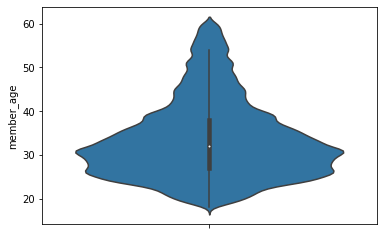

In [32]:
# violinplot member_age
sb.violinplot(data = df_clean, y = 'member_age');

#### Observations

> - Most of the bikers are around age 30. 
> - There are not that many bikers above age 40
> - The data is not evenly distributed.

### Distribution of Member Gender

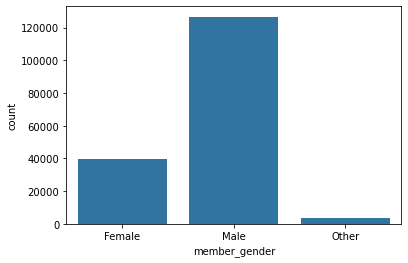

In [33]:
# countplot member_gender
sb.countplot(data = df_clean, x = 'member_gender', color=sb.color_palette()[0]);

#### Observations

> - Most of the bikers are male, namely three times as much as women.

In [34]:
# save cleaned data 
df_clean.to_csv('clean_master_file.csv', index=False)

## Bivariate Exploration

First, I want to look at the pairwise correlation of numeric variables

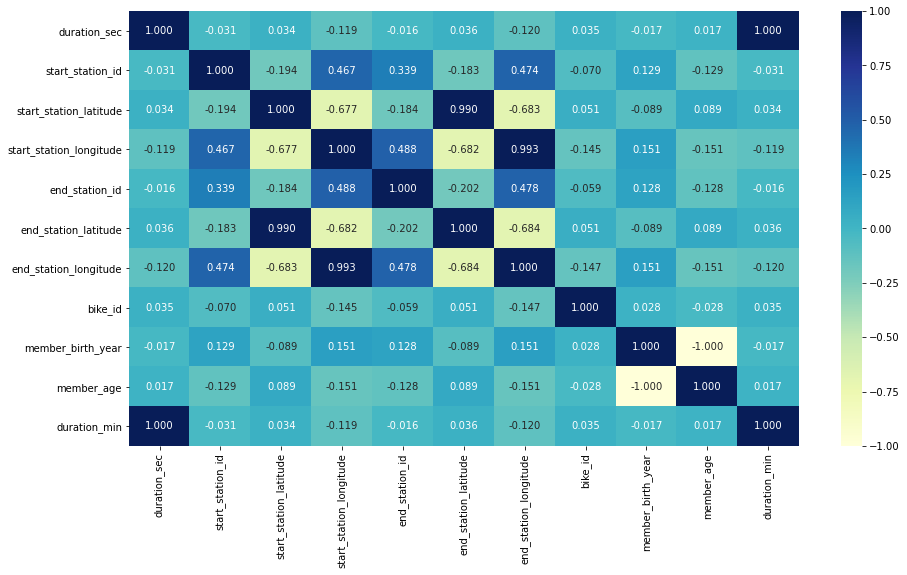

In [35]:
# correlation plot
numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_min']
plt.figure(figsize = [15, 8])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu', center = 0)
plt.show()

#### Observations

> - There are many pairs of variables that indicate a strong correlation. 

#### Therefore, I will focus on member_age, member_gender, user_type, duration_min, start_time_dayofweek and start_time_hourofday.

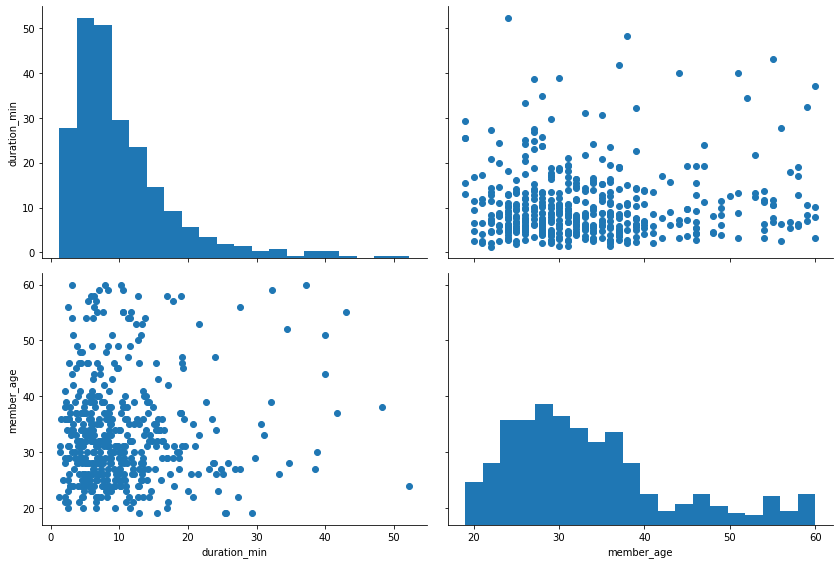

In [36]:
# plot matrix for duration_min & member_age with sample 500 records
np.random.seed(2018)
samples = np.random.choice(df_clean.shape[0], 500, replace = False)
df_clean_samp = df_clean.reindex(samples)

g = sb.PairGrid(data = df_clean_samp, vars = ['duration_min', 'member_age'], height = 4, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

#### Observations

> - The plot shows a dense area in the bottom left. Most rides are taken for 1 to 20 minutes of people in the range of age between 25 and 40.

### Boxplot for specified variables in correlation plot

C:\Users\D441118\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\D441118\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\D441118\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\D441118\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_de

<Figure size 1440x1440 with 0 Axes>

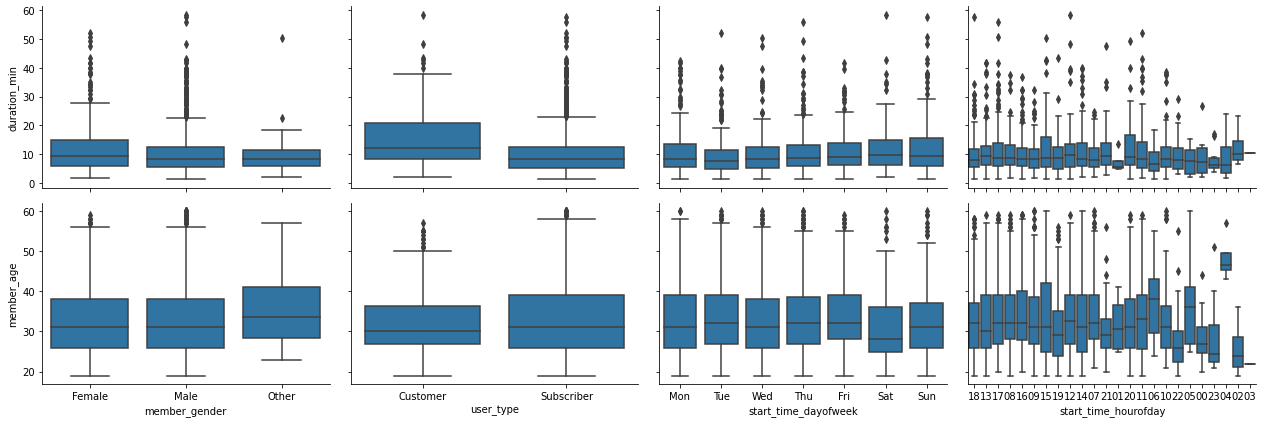

In [37]:
# boxplot matrix with boxgrid function
np.random.seed(2018)
samples = np.random.choice(df_clean.shape[0], 2000, replace = False)
df_clean_samp = df_clean.reindex(samples)

def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = sb.color_palette()[0]);

plt.figure(figsize = [20, 20]);
g = sb.PairGrid(data = df_clean_samp, y_vars = ['duration_min', 'member_age'], x_vars = ['member_gender', 'user_type', 'start_time_dayofweek', 'start_time_hourofday'], size = 3, aspect = 1.5);
g.map(boxgrid);

#### Observations - Member Age

> - The mean age of male bikers is equal to the mean age of female bikers.
> - The mean age of bikers who are belong to Subscriber type is higher than the mean age of bikers who are belong to Customer type.
> - The mean age of bikers on  Saturday and Sunday is lower than the mean age of bikers on other days.
> - The mean age of bikers who start between 5:00 AM to 7:00 AM and at 3:00 PM is higher compared to the mean age of bikers who start at other time frames.

#### Observations - Time Duration

> - Female bikers ride longer on average compared to male bikers.
> - Customer bikers ride longer on average compared to Subscriber bikers.
> - Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> - Bike rides start between 8:00 PM to 9:00 PM have the longest mean durations compared to other time frames.

### Distribution of Member Gender, User Type and Weekday

<AxesSubplot:xlabel='start_time_dayofweek', ylabel='count'>

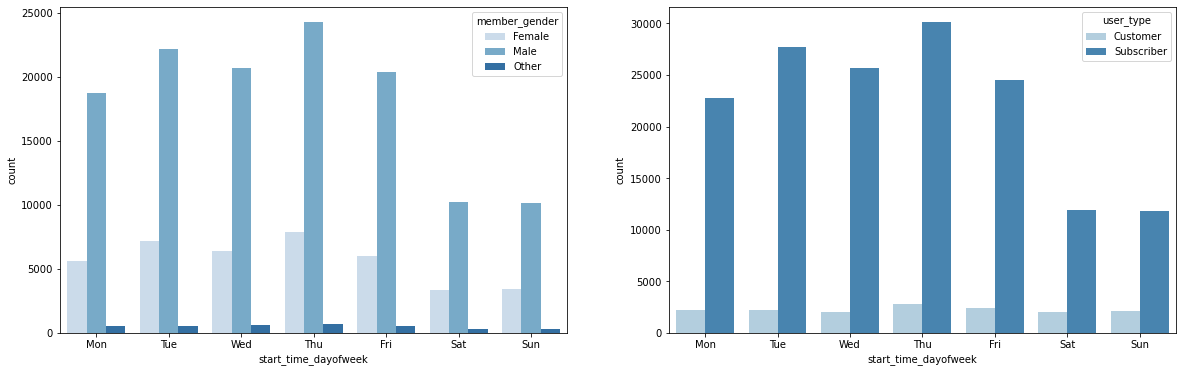

In [38]:
# countplot for member_gender & user_type and start_time_dayofweek
plt.figure(figsize = [20, 6]);

ax = plt.subplot(1, 2, 1);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Blues');

ax = plt.subplot(1, 2, 2);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'user_type', palette = 'Blues')

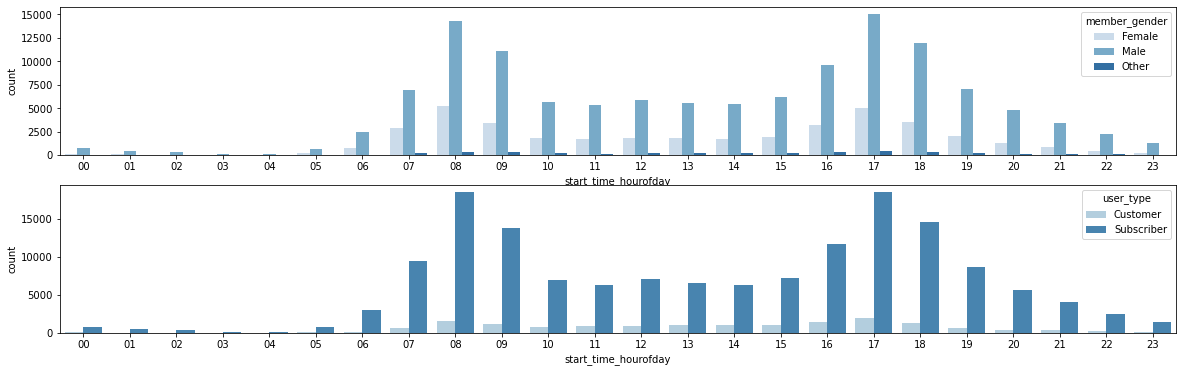

In [39]:
# countplot for member_gender & user_type and start_time_hourofday
plt.figure(figsize = [20, 6]);

ax = plt.subplot(2, 1, 1);
sb.countplot(data = df_clean, x = 'start_time_hourofday', hue = 'member_gender', palette = 'Blues');

ax = plt.subplot(2, 1, 2);
sb.countplot(data = df_clean, x = 'start_time_hourofday', hue = 'user_type', palette = 'Blues');

#### Observations

> - Most bikers are male with peak on Thursday, also for women. Subscriber predominate Customer user. The highest level is also reached on Thursday.

### Correlation Member Age and Time Duration

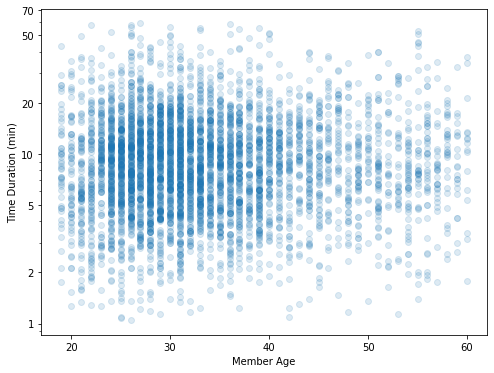

In [40]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
np.random.seed(2018)
samples = np.random.choice(df_clean.shape[0], 5000, replace = False)
df_clean_samp = df_clean.reindex(samples)

plt.figure(figsize = [8, 6]);
plt.scatter(data = df_clean_samp, x = 'member_age', y = 'duration_min', alpha = 1.5/10);
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 70], [1, 2, 5, 10, 20, 50, 70]);
plt.ylabel('Time Duration (min)');

#### Observations

> - The scatter plot shows a strong dense area for Member Age (25-35) and Time Duration (5-15 min).

### Investigation Mean Time Duration and Weekday

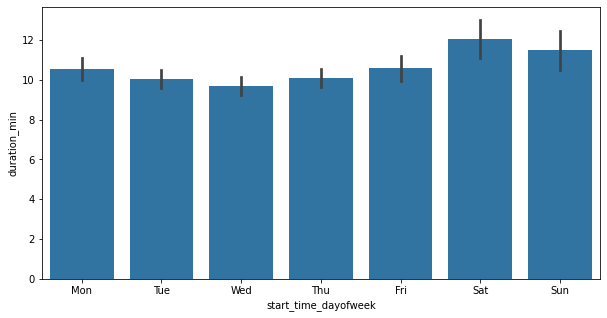

In [41]:
# barplot start_time_dayofweek & duration_min
plt.figure(figsize = [10, 5])
sb.barplot(data = df_clean_samp, x = 'start_time_dayofweek', y = 'duration_min', color=sb.color_palette()[0])
plt.show()

#### Observations

> - Bike rides on Saturday have on average the longest time duration.

## Multivariate Exploration

In this section, I will create plots of three or more variables to investigate the data even further.

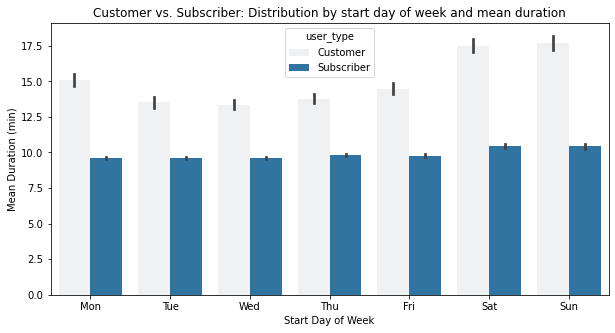

In [42]:
# barplot of duration_min, start_time_dayofweek and user_type
plt.figure(figsize=(10,5))

sb.barplot(data = df_clean, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type', color = sb.color_palette()[0])

plt.xlabel('Start Day of Week')
plt.ylabel('Mean Duration (min)')
plt.title("Customer vs. Subscriber: Distribution by start day of week and mean duration", fontsize=12);

#### Observations

> - Customer bike rides have on average a higher trip duration than bike rides of Subscriber and have the highest level on Saturday and Sunday.

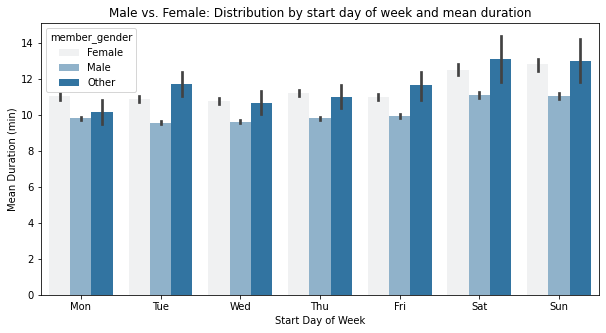

In [43]:
# barplot of duration_min, start_time_dayofweek and member_gender
plt.figure(figsize=(10,5))

sb.barplot(data = df_clean, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_gender', color = sb.color_palette()[0])
plt.xlabel('Start Day of Week')
plt.ylabel('Mean Duration (min)')
plt.title("Male vs. Female: Distribution by start day of week and mean duration", fontsize=12);

#### Observations

> - Female bike riders have on average a higher trip duration than trips of male bikers and have the highest level on Saturday and Sunday.

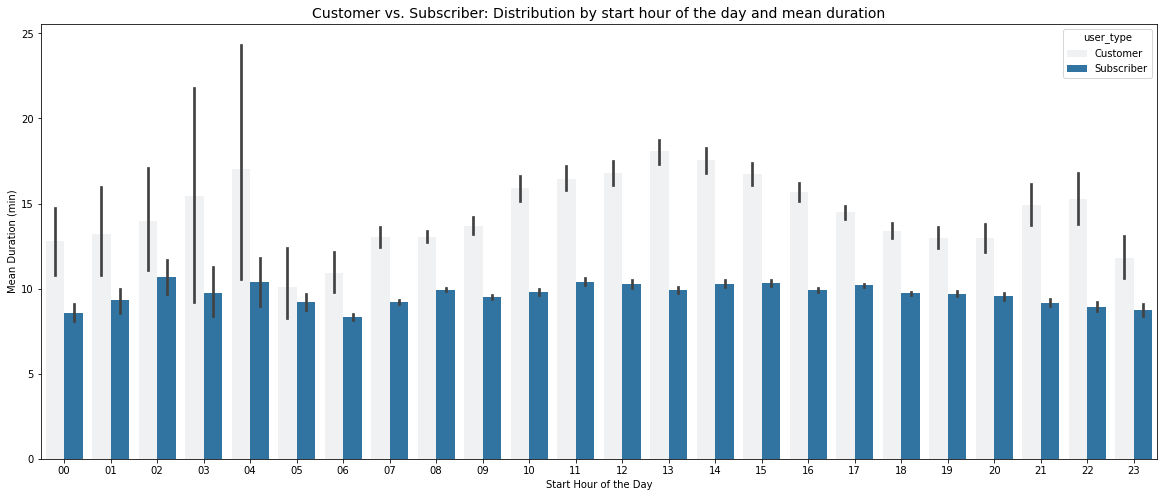

In [44]:
# barplot of duration_min, start_time_hourofday and user_type
plt.figure(figsize=(20, 8))

sb.barplot(data = df_clean, x = 'start_time_hourofday', y = 'duration_min', hue = 'user_type', color=sb.color_palette()[0])
plt.xlabel('Start Hour of the Day')
plt.ylabel('Mean Duration (min)')
plt.title("Customer vs. Subscriber: Distribution by start hour of the day and mean duration", fontsize = 14);

#### Observations

> - Customer rides are more volatil than bike rides of Subscribers during the day.
> - Bike rides started between 12:00 PM and 1:00 PM by Customer have on average the highest trip duration.

In [45]:
# barplot of duration_min, start_time_hourofday and member_gender
plt.figure(figsize=(20, 8))

sb.barplot(data = df_clean, x = 'start_time_hourofday', y = 'duration_min', hue = 'member_gender', color = sb.color_palette()[0])
plt.xlabel('Start Hour of the Day')
plt.ylabel('Mean Duration (min)')
plt.title("Male vs. Female: Distribution by start hour of the day and mean duration", fontsize = 14);

#### Observations

> - Bike rides start by female riders between 2:00 AM to 4:00 AM have the highest mean duration compared to other time frames. And is further quite stable.

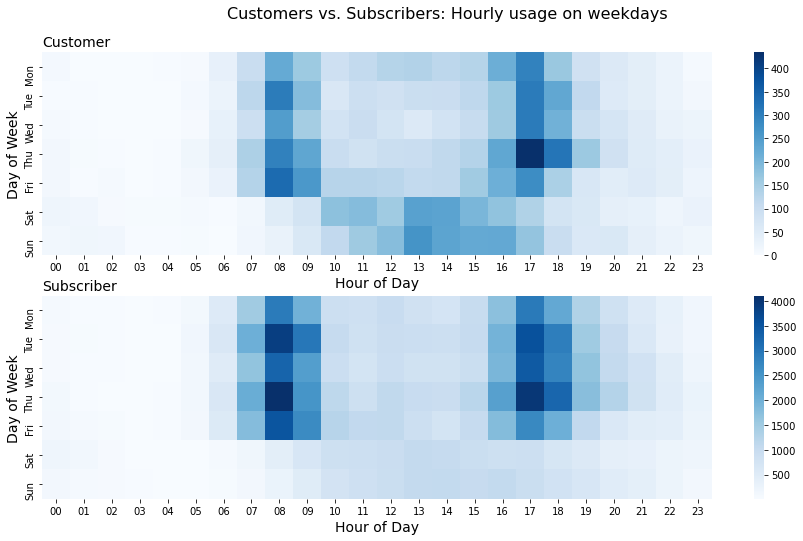

In [48]:
# plot heatmap Customers vs. Subscribers and their hourly usage during weekdays
plt.figure(figsize=(15,8))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Customers vs. Subscribers: Hourly usage on weekdays', fontsize = 16);

plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(ct_counts, cmap = "Blues");
plt.title('Customer', loc = 'left', fontsize = 14);
plt.xlabel('Hour of Day', fontsize = 14);
plt.ylabel('Day of Week', fontsize = 14);

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
st_counts = st_counts.reset_index(name = 'count')
st_counts = st_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(st_counts, cmap = "Blues");
plt.title('Subscriber', loc = 'left', fontsize = 14);
plt.xlabel('Hour of Day', fontsize = 14);
plt.ylabel('Day of Week', fontsize = 14);

#### Observations

> - Customers start their bike ride on Thursday between 5:00 PM to 6:00 PM the most. I think these people could be mainly commuters.
> - Subscribers start their bike ride in Thursday between 5:00 AM / PM to 6:00 AM / PM, but they also use the service more on the weekend. These users could mainly be tourists.

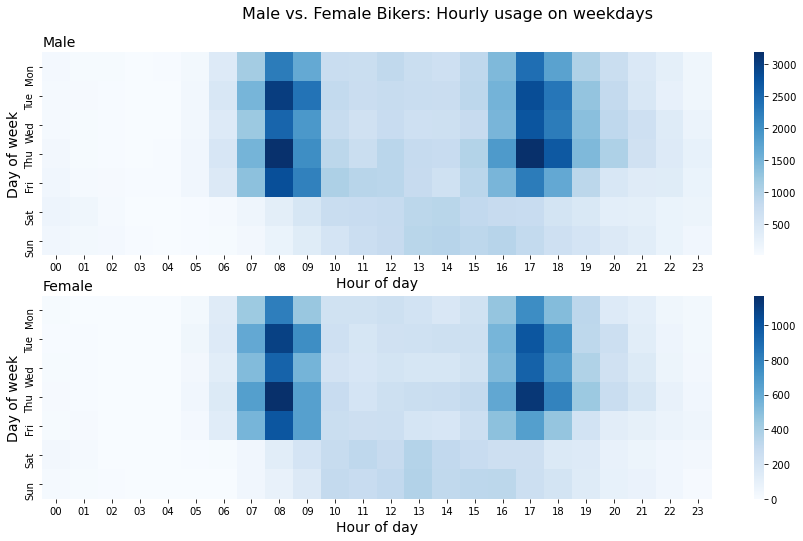

In [47]:
# plot heatmap Male vs. Female Riders and their hourly usage during weekdays
plt.figure(figsize=(15,8))
plt.subplots_adjust(top=0.9)
plt.suptitle('Male vs. Female Bikers: Hourly usage on weekdays', fontsize=16);

plt.subplot(2, 1, 1)
male = df_clean.query('member_gender == "Male"')
ct_counts = male.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(ct_counts, cmap = "Blues");
plt.title('Male', loc = 'left', fontsize = 14);
plt.xlabel('Hour of day', fontsize = 14);
plt.ylabel('Day of week', fontsize = 14);

plt.subplot(2, 1, 2)
female = df_clean.query('member_gender == "Female"')
st_counts = female.groupby(['start_time_dayofweek', 'start_time_hourofday']).size()
st_counts = st_counts.reset_index(name = 'count')
st_counts = st_counts.pivot(index = 'start_time_dayofweek', columns = 'start_time_hourofday', values = 'count')
sb.heatmap(st_counts, cmap = "Blues");
plt.title('Female', loc = 'left', fontsize = 14);
plt.xlabel('Hour of day', fontsize = 14);
plt.ylabel('Day of week', fontsize = 14);

#### Observations
>- Overall, there are more male than female bikers, but the usage shows a similar pattern.
> - Male riders start their bike ride on Thursday between 5:00 AM / PM to 6:00 AM / PM the most.
> - Female riders start their bike ride on Thursday between 5:00 AM / PM to 6:00 AM / PM the most.

In [49]:
# define hist function for multivariate plotting
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)

In [50]:
# plot histgram of member_age & duration_min and member_gender
g = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 3, size = 5)
g.map(hist2dgrid, 'member_age', 'duration_min', color = 'Blues')
g.set_xlabels('Member Age')
g.set_ylabels('Time Duration (min)')

plt.show()

C:\Users\D441118\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


#### Observations - Member Gender

> - Female bikers ride longer on average compared to male bikers.
> - Male bikers are older on average compared to female bikers.

In [51]:
# plot histgram of member_age & duration_min and user_type
g = sb.FacetGrid(data = df_clean, col = 'user_type', col_wrap = 3, size = 5)
g.map(hist2dgrid, 'member_age', 'duration_min', color = 'Blues')
g.set_xlabels('Member Age')
g.set_ylabels('Time Duration (min)')

plt.show()

#### Observations - User Type

> - Customer bikers have a longer trip duration on average compared to Subscriber bikers.
> - Subscriber bikers are older on average compared to Customer bikers.

## Key Findings
#### Bike Time Duration
The distribution of biking durations is skewed. The range of data points are between 1 minute to 1400+ minutes. The average is around 12 minutes and the median at around 9 minutes. For useful visualizations some data transformation was needed.
#### Bike Ride Trends
>- On Thursday between 5:00 and 6:00 PM the most bike rides are started, compared to the whole week and other hours.
>- Over the whole day, more male biker starts their trip than female riders with data peaks at 8:00 to 9:00 AM and 17:00 to 18:00 PM.
>- Over the whole day, more Subscriber (Member) starts their bike rides with data peaks at 8:00 to 9:00 AM and 17:00 to 18:00 PM.
>- Thursday has the most male and female bikers compared to other days. It also has the most Subscriber bikers compared to other days.
>- The weekend has the lowest frequency of bike rides in term of gender and user type compared to the rest of the week.
>- Most of the bikers are younger than 40 years across the whole week.
>- On the weekend the bike trips are on average longer compared to the trips on other days.
